# Práctica 3

date: 09/09/2023
File: practica_3.py
Author : Pablo Naim Chehade
Email: pablo.chehade.villalba@gmail.com
GitHub: https://github.com/Lupama2

In [16]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

In [17]:
#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [18]:
#Import data .dat
spikes = np.loadtxt('spikes.dat')
data_stimulus = np.loadtxt('stimulus.dat')

## Ejercicio 1

In [19]:
#Grafico en el tiempo una realización
# fig, ax = plt.subplots(1,1)
# ax.plot(spikes[0,:][:1000], 'o-')


In [63]:
def ISI_calculation(realizacion):
    #Calculo los ISI de una realización
    #realizacion es un vector de 0 y 1
    #Devuelve un vector con los ISI en unidades de 0.1 ms
    ISI = []
    for i in range(len(realizacion)):
        if realizacion[i] == 1:
            ISI.append(i)
    return np.array(ISI)

def ISI_total_calculation(realizaciones):
    #Calculo los ISI de todas las realizaciones
    #realizaciones es una matriz de 0 y 1
    #Devuelve un vector con los ISI en unidades de 0.1 ms
    ISI = np.array([])
    for realizacion in realizaciones:
        ISI = np.concatenate([ISI, ISI_calculation(realizacion)])
    return ISI

In [64]:
ISI_total = ISI_total_calculation(spikes)

In [ ]:
factor_to_ms = 1/10

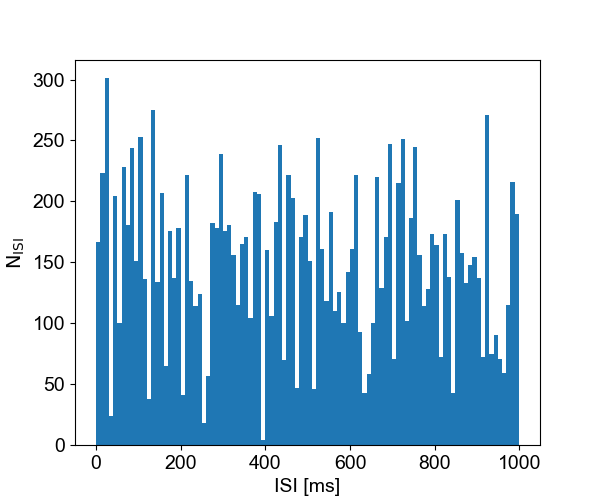

In [81]:
#Grafico el histograma normalizado de los ISI

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.hist(ISI_total*factor_to_ms, bins=100) #density=True
ax.set_xlabel('ISI [ms]')
ax.set_ylabel('$\mathrm{N_{ISI}}$')

plt.show()

#Guardo la figura
fig.savefig('Figures/ISI_histogram.png', bbox_inches='tight')


In [78]:
#Calculo media, desviación estandar y CV
media = np.mean(ISI_total)
desvio = np.std(ISI_total)
CV = desvio/media

#Imprimo datos
print(f'Media: {media*factor_to_ms} [ms]')
print(f'Desviación estandar: {desvio*factor_to_ms} [ms]')
print(f'CV: {CV}')




Media: 483.43009280897377 [ms]
Desviación estandar: 290.9797884418147 [ms]
CV: 0.6019066515927354


## Ejercicio 2

In [70]:
def N_calculation(realizaciones):
    #Calculo N
    #Devuelve un vector con los N
    return np.sum(realizaciones, axis=1)

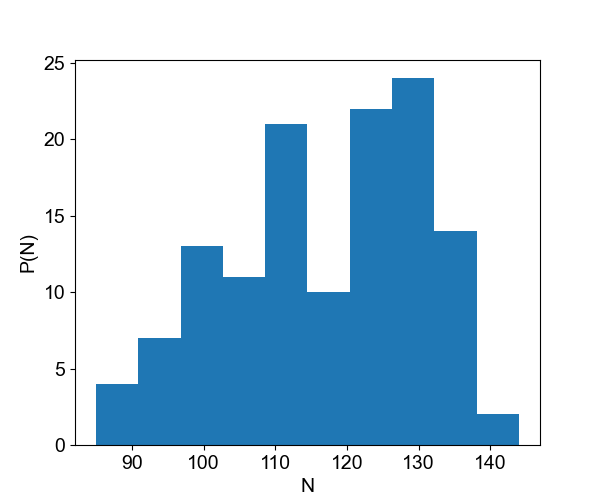

In [82]:
#Histograma de Ns normalizado

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.hist(N_calculation(spikes), bins=10) #density=True
ax.set_xlabel('N')
ax.set_ylabel('P(N)')

plt.show()

#Guardo figura
fig.savefig('Figures/N_histogram.png', bbox_inches='tight')



In [84]:
#Calculo media, desviación estándar y factor de Fano
media = np.mean(N_calculation(spikes))
desvio = np.std(N_calculation(spikes))
Fano = desvio**2/media

#Imprimo datos
print(f'Media: {media}')
print(f'Desviación estandar: {desvio}')
print(f'Fano: {Fano}')


Media: 117.0078125
Desviación estandar: 13.534964036333593
Fano: 1.5656668349803031


### ¿El proceso es tipo "renewal"?

In [85]:
#Veo si se cumple la relación F = CV^2
print(f'F = {Fano}')
print(f'CV^2 = {CV**2}')



F = 1.5656668349803031
CV^2 = 0.36229161723157854


## Ejercicio 3

In [96]:
def firing_rate_calculation(index, realizaciones, T):
    '''
    Calculo la tasa de disparo usando una caja de ancho T expresada en unidades de 0.1 ms, es decir, como índice. Tiene que ser múltiplo de 2
    '''

    #Tomo la parte entera de index y T
    index = int(index)
    T2 = int(T/2)

    #Defino los límites de la caja
    l_inf = index-T2
    l_sup = index+T2

    #Verifico que los límites de la caja estén dentro de la realizaciones. En caso negativo, redefino los límites
    
    if l_inf < 0:
        l_inf = 0
    if l_sup > len(realizaciones[0,:]):
        l_sup = len(realizaciones[0,:])

    return np.sum(realizaciones[:,index-T2:index+T2])

def firing_rate_total_calculation(realizaciones, T):

    t_vec = np.arange(len(realizaciones[0,:]))

    firing_rate = np.empty(len(t_vec))
    
    for i in range(len(t_vec)):
        firing_rate[i] = firing_rate_calculation(i, realizaciones, T)

    return firing_rate


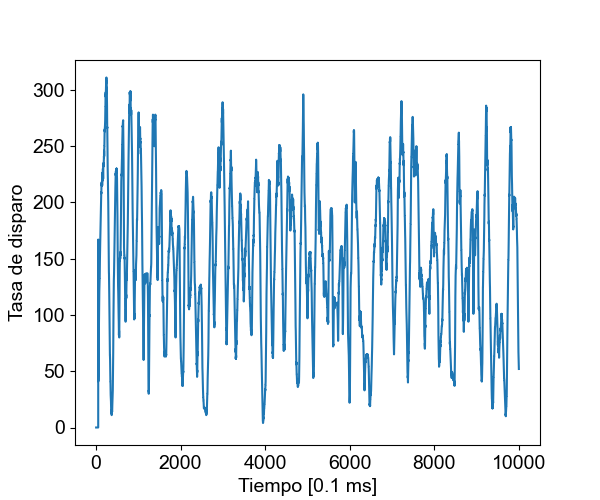

In [98]:
#Grafico la tasa de disparo
def plt_tasa_de_disparo(T):

    fig, ax = plt.subplots(1,1, figsize=(6,5))
    ax.plot(firing_rate_total_calculation(spikes, T))
    ax.set_xlabel('Tiempo [0.1 ms]')
    ax.set_ylabel('Tasa de disparo')
    plt.show()

    


## Ejercicio 4